In [2]:
import uproot, ROOT, glob, os, random, time, vector
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tqdm import tqdm
import pandas as pd
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Set up plot defaults
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 11 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font
sns.set(style="whitegrid")

path = '/eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/'
vbfh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.346190.PoPy8_NNPDF30_VBFH125_ttl13l7.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.346191.PoPy8_NNPDF30_VBFH125_ttlm15hp20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.346192.PoPy8_NNPDF30_VBFH125_ttlp15hm20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.346193.PoPy8_NNPDF30_VBFH125_tth30h20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
vbfh_xs_num = [346190, 346191, 346192, 346193]
             
ggh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.345120.PoPy8_NNLO_30_ggH125_ttl13l7.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.345121.PoPy8_NNLO_30_ggH125_ttlm15hp20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.345122.PoPy8_NNLO_30_ggH125_ttlp15hm20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.345123.PoPy8_NNLO_30_ggH125_tth30h20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
ggh_xs_num = [345120, 345121, 345122, 345123]

vv_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700491.Sh_2211_WqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700492.Sh_2211_WqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700493.Sh_2211_ZqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700495.Sh_2211_ZqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700600.Sh_2212_llll.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700601.Sh_2212_lllv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700602.Sh_2212_llvv_os.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700603.Sh_2212_llvv_ss.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700604.Sh_2212_lvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700605.Sh_2212_vvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
vv_xs_num = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605]

ztt_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.700792.Sh_2214_Ztt_maxHTpT_BF.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700793.Sh_2214_Ztt_maxHTpT_CFBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700794.Sh_2214_Ztt_maxHTpT_CVBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
ztt_xs_num = [700792, 700793, 700794]

Welcome to JupyROOT 6.30/04


In [4]:
def getXS(dsid):
    xs_file = "/cvmfs/atlas.cern.ch/repo/sw/database/GroupData/dev/PMGTools/PMGxsecDB_mc16.txt"
    try:
        with open(xs_file, "r") as f:
            for line in f:
                columns = line.split()
                if columns[0] == str(dsid):
                    return float(columns[2])*float(columns[3])*float(columns[4])
        print( "Couldn't find cross section for dsid", dsid, "so setting to 1.")
    except IOError:
        print("Cross section file not accessible on cvmfs.", dsid, " XS setting to 1.")
    return 1

def xs(List):
    return [getXS(i) for i in List]

vbfh_xs_num = [346190, 346191, 346192, 346193]
ggh_xs_num = [345120, 345121, 345122, 345123]
vv_xs_num = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605]
ztt_xs_num = [700792, 700793, 700794]

vbfh_xs = xs(vbfh_xs_num)
ggh_xs = xs(ggh_xs_num)
vv_xs = xs(vv_xs_num)
ztt_xs = xs(ztt_xs_num)

In [5]:
List = glob.glob(os.path.join(vbfh_path[0]))
f = uproot.open(List[0])
f.keys()
f['NOMINAL'].keys()

['HLT_j420',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1J100',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1SC111',
 'HTXS_Higgs_eta',
 'HTXS_Higgs_pt',
 'HTXS_Njets_pTjet25',
 'HTXS_Njets_pTjet30',
 'HTXS_Stage0_Category',
 'HTXS_Stage1_2_Category_pTjet25GeV',
 'HTXS_Stage1_2_Category_pTjet30GeV',
 'HTXS_Stage1_2_Fine_Category_pTjet25GeV',
 'HTXS_Stage1_2_Fine_Category_pTjet30GeV',
 'HTXS_Stage1_Category_pTjet25GeV',
 'HTXS_Stage1_Category_pTjet30GeV',
 'HTXS_errorMode',
 'HTXS_prodMode',
 'NOMINAL_pileup_combined_weight',
 'NOMINAL_pileup_random_lb_number',
 'NOMINAL_pileup_random_run_number',
 'PRW_DATASF_1down_pileup_combined_weight',
 'PRW_DATASF_1up_pileup_combined_weight',
 'beamSpotWeight',
 'boson_0',
 'boson_0_classifierParticleOrigin',
 'boson_0_classifierParticleType',
 'boson_0_mother_pdgId',
 'boson_0_mother_status',
 'boson_0_origin',
 'boson_0_p4',
 'boson_0_pdgId',
 'boson_0_pz',
 'boson_0_q',
 'boson_0_status',
 'boson_0_type',
 'channel_index',
 'ditau_obj_IsTruthHadronic',
 'ditau_ob

Ten variables are used as input to the NN: pT of the two leptons and leading
jet, p
miss
T
, mass and pT of the Higgs boson reconstructed from the τ candidates and ~p
miss
T
, ST
(defined as the scalar sum of the pT of all jets and leptons in the events), transverse mass of the
4
lepton and ~p
miss
T
, value of the MVA isolation of the closest boosted τh
candidate to the muon
(electron) in the µτh
and eµ (eτh
and eµ) channels, and di-τ mass.

In [7]:
branches = \
['HLT_j420',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1J100',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1SC111',
 'boson_0_p4',
 'ditau_obj_IsTruthHadronic',
 'ditau_obj_IsTruthMatched',
#  'ditau_obj_R_jet',
#  'ditau_obj_R_subjet',
#  'ditau_obj_Rr_core',
 'ditau_obj_bdt_score',
 'ditau_obj_charge',
 'ditau_obj_leadsubjet_charge',
 'ditau_obj_leadsubjet_n_core_tracks',
 'ditau_obj_leadsubjet_p4',
 'ditau_obj_nSubjets',
 'ditau_obj_n_iso_tracks',
 'ditau_obj_n_tracks',
#  'ditau_obj_p4',
 'ditau_obj_subjets_dR',
 'ditau_obj_subleadsubjet_charge',
 'ditau_obj_subleadsubjet_n_core_tracks',
 'ditau_obj_subleadsubjet_p4',
 'ditau_obj_tauJetVtxFraction',
 'jets_p4',
#  'ditau_obj_truth_leadTau_p4',
#  'ditau_obj_truth_p4',
#  'ditau_obj_truth_subleadTau_p4',
 'event_number',
 'weight_mc']

In [9]:
def read_root(file_paths):
    out = []
    for index in range(len(file_paths)):
        l1 = glob.glob(os.path.join(file_paths[index]))
        s = time.time()
        for i in range(len(l1)):
            f_1 = uproot.open(l1[i]+':NOMINAL')
            events = f_1.arrays(branches, library='ak')
            out = ak.concatenate((events, out))
        print("processed: ", l1[i], "time spent", round(time.time()-s, 4), 's')
    return out

vbfh = read_root(vbfh_path)
ggh = read_root(ggh_path)
vv = read_root(vv_path)
ztt = read_root(ztt_path)

processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.346190.PoPy8_NNPDF30_VBFH125_ttl13l7.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.36940915._000001.HSM_common.root time spent 0.194 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.346191.PoPy8_NNPDF30_VBFH125_ttlm15hp20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.36940916._000001.HSM_common.root time spent 0.362 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.346192.PoPy8_NNPDF30_VBFH125_ttlp15hm20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.36940917._000001.HSM_common.root time spent 0.2092 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httb

In [10]:
def Cut(t):
    cut = ak.where((t['ditau_obj_nSubjets'] >= 2) &
                   (t['HLT_j420'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111'] > 0) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   ((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3)))

    return t[cut]

In [11]:
ggh_cut = Cut(ggh)
vbfh_cut = Cut(vbfh)
vv_cut = Cut(vv)
ztt_cut = Cut(ztt)

In [25]:
def Printcut(t):
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) &
                   (t['HLT_j420'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111'] > 0))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) &
           (t['HLT_j420'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111'] > 0) &
            (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) &
               (t['HLT_j420'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111'] > 0) &
                (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) & 
                 (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) &
                   (t['HLT_j420'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] + t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111'] > 0) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   ((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3)))[0]))

In [31]:
Printcut(ztt)

22852463
8994590
1001671
174634
130012


In [68]:
def Var(t):
    '''
    return 'leadsubjet_pT', 'subleadsubjet_pT', 'higgs_m', 'higgs_pT',
    'pT_miss', 'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
    'leadsubjet_phi', 'subleadsubjet_phi',
    'collinear_mass'
    '''
    leadsubjet_p4 = vector.obj(pt=t['ditau_obj_leadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_leadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_leadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_leadsubjet_p4'].fE)
    
    subleadsubjet_p4 = vector.obj(pt=t['ditau_obj_subleadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_subleadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_subleadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_subleadsubjet_p4'].fE)
    
    higgs_p4 = vector.obj(pt=t['boson_0_p4'].fP.fX,
                          eta=t['boson_0_p4'].fP.fY,
                          phi=t['boson_0_p4'].fP.fZ,
                          energy=t['boson_0_p4'].fE)
    
    pT_miss = -ak.sum(t['jets_p4'].fP.fX, axis=-1)
    ditau_m = (leadsubjet_p4 + subleadsubjet_p4).mass
    
#     x_lead = leadsubjet_p4.pt / (leadsubjet_p4.pt+pT_miss)
#     x_sublead = subleadsubjet_p4.pt / (subleadsubjet_p4.pt+pT_miss)
#     collinear_mass = ditau_m / np.sqrt(x_lead*x_sublead)
    
    return [leadsubjet_p4.pt, subleadsubjet_p4.pt, #higgs_p4.mass, higgs_p4.pt, \
            pT_miss, ditau_m, leadsubjet_p4.eta, subleadsubjet_p4.eta, \
            leadsubjet_p4.phi, subleadsubjet_p4.phi]
           
    

In [63]:
vv_cut['ditau_obj_subleadsubjet_p4'].fP.fX

<Array [152, 100, 10.1, ... 66.7, 68.5, 154] type='7111 * float64'>

In [65]:
vv_plot[1]

<Array [152, 100, 10.1, ... 66.7, 68.5, 154] type='7111 * float64'>

In [69]:
ggh_plot = Var(ggh_cut)
vbfh_plot = Var(vbfh_cut)
vv_plot = Var(vv_cut)
ztt_plot = Var(ztt_cut)

In [60]:
min(ggh_plot[2]), min(ggh_plot[2])

-inf

Start Plot: leadsubjet_pT
Start Plot: subleadsubjet_pT
Start Plot: pT_miss
Start Plot: ditau_m
Start Plot: leadsubjet_eta
Start Plot: subleadsubjet_eta
Start Plot: leadsubjet_phi
Start Plot: subleadsubjet_phi


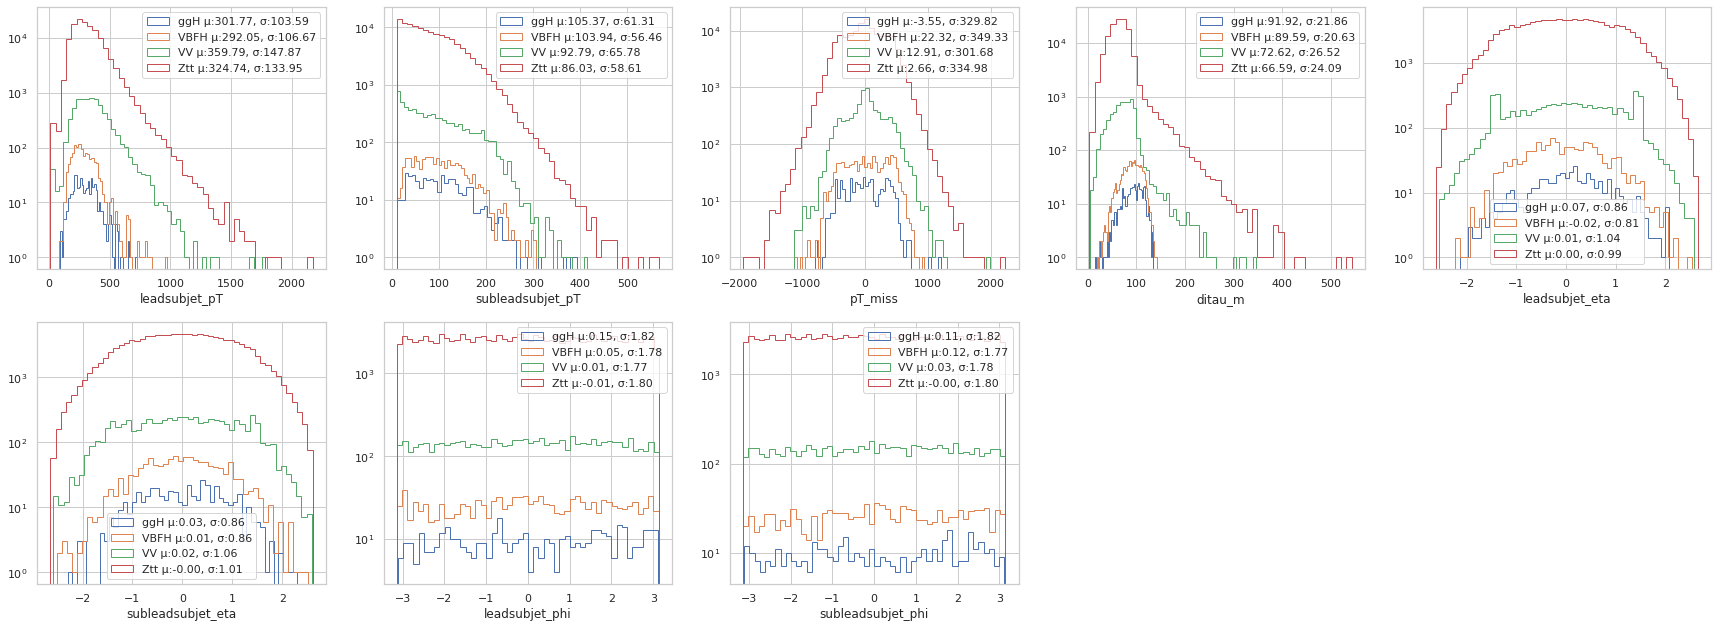

In [71]:
plot_var = [
    'leadsubjet_pT', 'subleadsubjet_pT', #'higgs_m', 'higgs_pT',
    'pT_miss', 'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
    'leadsubjet_phi', 'subleadsubjet_phi'
#     'collinear_mass'
]

plt.figure(figsize=(30, 28))
def hist(variable, plot_num):
    print("Start Plot:", variable)
    plt.subplot(5, 5, plot_num+1)
    bin = 50
    plt.hist(ggh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'ggH μ:{np.mean(ggh_plot[i]):.2f}, σ:{np.std(ggh_plot[i]):.2f}')
    plt.hist(vbfh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VBFH μ:{np.mean(vbfh_plot[i]):.2f}, σ:{np.std(vbfh_plot[i]):.2f}')
    plt.hist(vv_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VV μ:{np.mean(vv_plot[i]):.2f}, σ:{np.std(vv_plot[i]):.2f}')
    plt.hist(ztt_plot[i], bins=bin, histtype='step', linewidth=1, label=f'Ztt μ:{np.mean(ztt_plot[i]):.2f}, σ:{np.std(ztt_plot[i]):.2f}')
    plt.xlabel(variable)
    #plt.ylabel("Number of Events (scaled)")
    #plt.title(xlabel)
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_var, 0):
    hist(label, i)

In [ ]:
plt.figure(figsize=(30, 28))
def hist(variable, plot_num):
    print("Start Plot:", variable)
    plt.subplot(5, 5, plot_num)
    bin = 50
    bkg_tmp = combine(variable, bkg=True)
    plt.hist(bkg_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_tmp):.2f}, σ:{np.std(bkg_tmp):.2f}')
    signal_tmp = combine(variable, signal=True)
    plt.hist(signal_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_tmp):.2f}, σ:{np.std(signal_tmp):.2f}')
    plt.xlabel(variable)
    #plt.ylabel("Number of Events (scaled)")
    #plt.title(xlabel)
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_var, 1):
    hist(label, i)

In [ ]:
plt.figure(figsize=(30, 28))
def hist(variable, plot_num):
    print("Start Plot:", variable)
    plt.subplot(5, 5, plot_num)
    bin = 50
    bkg_tmp = combine(variable, bkg=True)
    plt.hist(bkg_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_tmp):.2f}, σ:{np.std(bkg_tmp):.2f}')
    signal_tmp = combine(variable, signal=True)
    plt.hist(signal_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_tmp):.2f}, σ:{np.std(signal_tmp):.2f}')
    #plt.hist(bkg[variable], bins=bin, histtype='step', linewidth=1, label=f'qcd μ:{np.mean(bkg[variable]):.2f}, σ:{np.std(bkg[variable]):.2f}')
    #plt.hist(signal[variable], bins=bin, histtype='step', linewidth=1, label=f'signal μ:{np.mean(signal[variable]):.2f}, σ:{np.std(signal[variable]):.2f}')
    plt.xlabel(variable)
    #plt.ylabel("Number of Events (scaled)")
    #plt.title(xlabel)
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_var, 1):
    hist(label, i)